# MARINe: Sea star and Katharina count conversion

MARINe conducts long-term monitoring at sites along the coast of North America approximately annually. At sites where they are sufficiently abundant, ochre sea stars (Pisaster ochraceus) are monitored either within band transects or in irregularly sized plots. Other organisms, such as other sea stars or Katharina tunicata, are often also counted if they are present within the plots. There are generally 3 replicate plots per site. These plots are permanent, but chosen to target high densities of sea stars. They are intended to track changes in density and size frequency within a site, and the resulting data should not be used for comparisons between sites. 

Within each plot, sea stars are counted and measured. Measurements are taken from the center of the disk to the tip of the longest ray and are performed using calipers. These measurements are recorded to the nearest 5 mm for small sea stars (< 10 mm arm length) and to the nearest 10 mm for larger sea stars. Often, sizes have to be estimated due to the orientation or inaccessibility of the sea star. Early surveys binned sea stars into size classes, and these size classes shifted once through time. If there are many sea stars within a particular plot, only a subset of them may be measured.

If Katharina are present in a sea star plot, they are counted, and up to 15 of them may be measured to the nearest 10 mm.

At sites where sea stars are not abundant, a timed search protocol is used to document rarity. 

**Resources:**
- DataONE link: https://data.piscoweb.org/metacatui/view/doi:10.6085/AA/marine_ltm.4.8

In [1]:
## Import packages

import pandas as pd
import numpy as np
from datetime import datetime

import pyworms

from SPARQLWrapper import SPARQLWrapper, JSON

## Load data

In [2]:
## Load data

data = pd.read_csv('MARINe_LTM_counts_2020.csv')
print(data.shape)
data.head()

(20122, 29)


,group_code,marine_site_name,site_code,site_lat,site_long,ltm_lat,ltm_long,marine_sort_order,marine_common_year,season_name,...,method_code,state_province,georegion,bioregion,mpa_designation,mpa_region,mpa_lt_region,mpa_name,island,last_updated
0,CSUF,Crystal Cove,CRCO,33.570782,-117.83773,33.570782,-117.83773,6660,2006,Spring,...,GSES,California,CA South,Government Point to Mexico,SMCA,South Coast,South Coast,Crystal Cove SMCA,Mainland,2021-07-26 21:16:31
1,CSUF,Crystal Cove,CRCO,33.570782,-117.83773,33.570782,-117.83773,6660,2006,Fall,...,GSES,California,CA South,Government Point to Mexico,SMCA,South Coast,South Coast,Crystal Cove SMCA,Mainland,2021-07-26 21:16:31
2,CSUF,Crystal Cove,CRCO,33.570782,-117.83773,33.570782,-117.83773,6660,2007,Spring,...,GSES,California,CA South,Government Point to Mexico,SMCA,South Coast,South Coast,Crystal Cove SMCA,Mainland,2021-07-26 21:16:31
3,CSUF,Crystal Cove,CRCO,33.570782,-117.83773,33.570782,-117.83773,6660,2007,Fall,...,GSES,California,CA South,Government Point to Mexico,SMCA,South Coast,South Coast,Crystal Cove SMCA,Mainland,2021-07-26 21:16:31
4,CSUF,Crystal Cove,CRCO,33.570782,-117.83773,33.570782,-117.83773,6660,2008,Spring,...,GSES,California,CA South,Government Point to Mexico,SMCA,South Coast,South Coast,Crystal Cove SMCA,Mainland,2021-07-26 21:16:31


In [3]:
## Site table

site = pd.read_csv('MARINe_site_table_2020.csv')
print(site.shape)
site.head()

(372, 17)


,site_code,marine_site_name,marine_sort_order,county,island,state_province,country,latitude,longitude,pisco_code,mpa_designation,mpa_region,mpa_lt_region,mpa_name,LTM_project_short_code,georegion,bioregion
0,PBOR,Otter Rock; Peterson Bay,1100,Kenai Peninsula,Mainland,Alaska,United States,59.574501,-151.29520,NONE,NONE,NONE,NONE,NONE,NONE,AK Southcentral,Alaska to British Columbia
1,ORST,Otter Rock; Peterson Bay ST,1105,Kenai Peninsula,Mainland,Alaska,United States,59.579582,-151.29510,NONE,NONE,NONE,NONE,NONE,NONE,AK Southcentral,Alaska to British Columbia
2,PBLG,Peterson Bay Lagoon,1106,Kenai Peninsula,Mainland,Alaska,United States,59.579300,-151.29590,NONE,NONE,NONE,NONE,NONE,NONE,AK Southcentral,Alaska to British Columbia
3,PBCP,China Poot,1110,Kenai Peninsula,Mainland,Alaska,United States,59.572102,-151.30270,NONE,NONE,NONE,NONE,NONE,NONE,AK Southcentral,Alaska to British Columbia
4,CPST,China Poot ST,1111,Kenai Peninsula,Mainland,Alaska,United States,59.571854,-151.30235,NONE,NONE,NONE,NONE,NONE,NONE,AK Southcentral,Alaska to British Columbia


In [4]:
## Species table

species = pd.read_csv('MARINe_species_table_2020.csv')
print(species.shape)
species.head()

(264, 13)


,species_code,marine_species_name,marine_species_definition,WoRMS_AphiaID,taxonomic_source,kingdom,phylum,class,order,family,genus,species,load_date
0,ACAPUN,acanthina punctulata,acanthina punctulata,580790.0,World Register of Marine Species: www.marines...,Animalia,Mollusca,Gastropoda,Neogastropoda,Muricidae,Acanthina,Acanthina punctulata,2021-03-30
1,ACASPI,acanthina spirata,acanthina spirata,580791.0,World Register of Marine Species: www.marines...,Animalia,Mollusca,Gastropoda,Neogastropoda,Muricidae,Acanthina,Acanthina spirata,2021-03-30
2,ACASPP,acanthinucella spp,acanthinucella spp,403857.0,World Register of Marine Species: www.marines...,Animalia,Mollusca,Gastropoda,Neogastropoda,Muricidae,Acanthinucella,NaN,2021-03-30
3,ACRSPP,acrosiphonia spp; cladophora spp,acrosiphonia/cladophora spp (not c. columbiana),146216.0,World Register of Marine Species: www.marines...,Plantae,(Division) Chlorophyta,Ulvophyceae,NaN,NaN,NaN,NaN,2021-03-30
4,AHNLIN,ahnfeltiopsis linearis,ahnfeltiopsis linearis,372234.0,World Register of Marine Species: www.marines...,Plantae,(Division) Rhodophyta,Florideophyceae,Gigartinales,Phyllophoraceae,Ahnfeltiopsis,Ahnfeltiopsis linearis,2021-03-30


## Conversion

### Occurrence
Here, it seems like an **event** can be a survey, uniquely defined by the site code, year, and season. Actually, it looks like sometimes there have been multiple surveys within a given site, year, and season. So maybe the best way to go is site, min date, max date.

```python
# Instances where multiple surveys occurred within a given site, year, and season
out = data.groupby(['site_code', 'marine_common_year', 'season_name'])['min_survey_date'].nunique()
out[out > 1]

# Examine the dates for an example:
data[(data['site_code'] == 'BOA') & (data['marine_common_year'] == 2003)].iloc[:, 0:20]
```

An **occurrence** can be defined as an individual organism observed during an event.

Measurements only pertain to occurrences, so I don't need a separate event file.

In [5]:
## eventID

occ = pd.DataFrame({'eventID':data['site_code'] + '_' + data['min_survey_date'] + '_' + data['max_survey_date']})
print(occ.shape)
occ.head()

(20122, 1)


,eventID
0,CRCO_2006-03-26_2006-03-26
1,CRCO_2006-11-04_2006-11-04
2,CRCO_2007-04-14_2007-04-14
3,CRCO_2007-10-27_2007-10-27
4,CRCO_2008-03-16_2008-03-16


In [6]:
## eventDate

occ['eventDate'] = data['min_survey_date'] + '/' + data['max_survey_date']
occ.head()

,eventID,eventDate
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16


In [7]:
## datasetName

occ['datasetName'] = 'MARINe LTM - sea star and katharina counts and sizes'
occ.head()

,eventID,eventDate,datasetName
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...


In [8]:
## Merge with site table to get locality, county, stateProvince, countryCode, decimalLat, decimalLon

# Add site code to occ
occ['site_code'] = data['site_code']

# Define columns to merge from site table
site_cols = [
    'site_code',
    'marine_site_name',
    'county',
    'state_province',
    'country',
    'latitude',
    'longitude',
]

# Define DwC terms for these columns after merge
dwc_cols = [
    'eventID',
    'eventDate',
    'datasetName',
    'locality',
    'county',
    'stateProvince',
    'countryCode',
    'decimalLatitude',
    'decimalLongitude',
]

# Merge
occ = occ.merge(site[site_cols], how='left', on='site_code')
occ.drop(columns=['site_code'], inplace=True)
occ.columns = dwc_cols
print(occ.shape)
occ.head()

(20122, 9)


,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,United States,33.570782,-117.83773
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,United States,33.570782,-117.83773
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,United States,33.570782,-117.83773
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,United States,33.570782,-117.83773
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,United States,33.570782,-117.83773


**Note** that ideally we would check county and state names against the [Getty Thesaurus of Geographic Names](http://www.getty.edu/research/tools/vocabularies/tgn/). 

Here, I've implemented a search using GTGN's SPARQL endpoint for all county names in the US. I've then filtered the output to obtain county names only in relevant states, and checked the county names in the MARINe dataset against that list. There's probably a way to write a more nuanced SPARQL query to check each individual name, but that seems like it will take more investment than I want to put in right now.

In [9]:
## Search GTGN for all counties in the US

# Define sql strings
counties_query = """
    select distinct * {
        ?place skos:inScheme tgn: ;
        gvp:placeTypePreferred [gvp:prefLabelGVP [xl:literalForm ?type]];
        gvp:placeType|(gvp:placeType/gvp:broaderGenericExtended) [rdfs:label "counties"@en];
        gvp:broaderPartitiveExtended [rdfs:label "United States"@en];
        gvp:prefLabelGVP [xl:literalForm ?name];
        gvp:parentString ?parents}
"""

divisions_query = """
    select distinct * {
        ?place skos:inScheme tgn: ;
        gvp:placeTypePreferred [gvp:prefLabelGVP [xl:literalForm ?type]];
        gvp:placeType|(gvp:placeType/gvp:broaderGenericExtended) [rdfs:label "national divisions"@en];
        gvp:broaderPartitiveExtended [rdfs:label "United States"@en];
        gvp:prefLabelGVP [xl:literalForm ?name];
        gvp:parentString ?parents}
"""

# Set up query
sparql = SPARQLWrapper("http://vocab.getty.edu/sparql")
sparql.setReturnFormat(JSON)
sparql.setQuery(counties_query)

# Obtain county results
try:
   counties_ret = sparql.query().convert()
except e:
   print(e)

# Obtain national division results (Alaska has boroughs and census districts, not counties)
sparql.setQuery(divisions_query)
try:
   div_ret = sparql.query().convert()
except e:
   print(e)

**Ok, so the question is: How can I search for placeType is counties OR national divisions??**

In [10]:
## Clean result

# Extract into data frame
county_df = pd.DataFrame(counties_ret['results']['bindings'])
county_df = county_df.applymap(lambda x: x['value'])
div_df = pd.DataFrame(div_ret['results']['bindings'])
div_df = div_df.applymap(lambda x: x['value'])

# Concatenate
county_df = pd.concat([county_df, div_df])
county_df.drop_duplicates(inplace=True)

# Unpack state, country etc. that each county is located in
county_df[['state', 'country', 'continent', 'planet', 'other']] = county_df['parents'].str.split(', ', expand=True)

# Filter
county_df = county_df[(county_df['country'] == 'United States') & (county_df['state'].isin(occ['stateProvince'].unique()))].copy()
county_df.head()

,place,type,name,parents,state,country,continent,planet,other
17,http://vocab.getty.edu/tgn/2002238,counties,Adams,"Washington, United States, North and Central A...",Washington,United States,North and Central America,World,None
41,http://vocab.getty.edu/tgn/1002138,counties,Alameda,"California, United States, North and Central A...",California,United States,North and Central America,World,None
89,http://vocab.getty.edu/tgn/1002145,counties,Alpine,"California, United States, North and Central A...",California,United States,North and Central America,World,None
95,http://vocab.getty.edu/tgn/2002239,counties,Asotin,"Washington, United States, North and Central A...",Washington,United States,North and Central America,World,None
101,http://vocab.getty.edu/tgn/1002146,counties,Amador,"California, United States, North and Central A...",California,United States,North and Central America,World,None


In [11]:
## Check MARINe counties

for c in occ['county'].unique():
    if c not in county_df['name'].unique():
        print('County {} is not listed in GTGN. Double check name'.format(c))

All county names appear to be accurate.

In [12]:
## Clean countryCode

occ['countryCode'] = occ['countryCode'].str.replace('United States', 'US')
occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773


In [13]:
## coordinatUncertaintyInMeters

occ['coordinateUncertaintyInMeters'] = 350
occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350


In [14]:
## Add minimumDepthInMeters, maximumDepthInMeters, samplingProtocol and samplingEffort

# Depth
occ['minimumDepthInMeters'] = 0
occ['maximumDepthInMeters'] = 0

# Protocol
occ['samplingProtocol'] = data['method_code']
occ['samplingProtocol'] = occ['samplingProtocol'].replace({
    'BT25':'Band transect 2m x 5m',
    'GSES':'General search entire site',
    'IP':'Irregular plot',
    'TS30':'Timed search 30 minutes'
})

# Effort
occ['samplingEffort'] = data['num_plots_sampled'].astype(str) + ' plot(s)'
occ.loc[occ['samplingProtocol'] == 'Band transect 2m x tm', 'samplingEffort'] = data['num_plots_sampled'].astype(str) + ' transect(s)'
occ.loc[occ['samplingProtocol'].isin(['General search entire site', 'Timed search 30 minutes']), 'samplingEffort'] = '1 site'

occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,minimumDepthInMeters,maximumDepthInMeters,samplingProtocol,samplingEffort
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site


**Note** that for the protocols 'general search entire site' and 'timed search 30 minutes' the effort is always 1. **I've set the effort to 1 site (rather than n plot(s) or n transect(s) as I've done with the irregular plot and transect surveys).**

In [15]:
## occurrenceID

occ['occurrenceID'] = data.groupby(['site_code', 'min_survey_date', 'max_survey_date'])['species_code'].cumcount()+1
occ['occurrenceID'] = occ['eventID'] + '_' + occ['occurrenceID'].astype(str)
occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,minimumDepthInMeters,maximumDepthInMeters,samplingProtocol,samplingEffort,occurrenceID
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2006-03-26_2006-03-26_1
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2006-11-04_2006-11-04_1
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2007-04-14_2007-04-14_1
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2007-10-27_2007-10-27_1
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2008-03-16_2008-03-16_1


In [16]:
## scientificName

# Get species codes
occ['scientificName'] = data['species_code']

# Create scientificName column in species table
sp = species[['species_code', 'kingdom', 'phylum', 'class', 'order', 'family', 'genus', 'species']]
sp = sp.replace('NULL', np.nan, regex=True)
sp['scientificName'] = sp['species']
sp['scientificName'] = sp['scientificName'].combine_first(sp['family'])
sp['scientificName'] = sp['scientificName'].combine_first(sp['order'])
sp['scientificName'] = sp['scientificName'].combine_first(sp['class'])
sp['scientificName'] = sp['scientificName'].combine_first(sp['phylum'])
sp['scientificName'] = sp['scientificName'].combine_first(sp['kingdom'])

# Build dictionary mapping codes to names
sp_dict = dict(zip(sp['species_code'], sp['scientificName']))

# Replace codes with names in occ
occ['scientificName'] = occ['scientificName'].replace(sp_dict)
occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,minimumDepthInMeters,maximumDepthInMeters,samplingProtocol,samplingEffort,occurrenceID,scientificName
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2006-03-26_2006-03-26_1,Pisaster ochraceus
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2006-11-04_2006-11-04_1,Pisaster ochraceus
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2007-04-14_2007-04-14_1,Pisaster ochraceus
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2007-10-27_2007-10-27_1,Pisaster ochraceus
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,0,0,General search entire site,1 site,CRCO_2008-03-16_2008-03-16_1,Pisaster ochraceus


In [17]:
## Get unique names

names = occ['scientificName'].unique()
names

array(['Pisaster ochraceus', 'Asteriidae', 'Patiria miniata',
       'Pisaster brevispinus', 'Pisaster giganteus',
       'Evasterias troschelii', 'Echinasteridae',
       'Pycnopodia helianthoides', 'Orthasterias koehleri',
       'Dermasterias imbricata', 'Katharina tunicata'], dtype=object)

In [18]:
## Check names on WoRMS

results = pyworms.aphiaRecordsByMatchNames(names.tolist())
if len(results) == len(names): print('All names found.')

# Unpack results
worms_out = pd.json_normalize(results[0])
for i in range(1, len(results)):
    norm = pd.json_normalize(results[i])
    worms_out = pd.concat([worms_out, norm])
worms_out

All names found.


,AphiaID,url,scientificname,authority,status,unacceptreason,taxonRankID,rank,valid_AphiaID,valid_name,...,genus,citation,lsid,isMarine,isBrackish,isFreshwater,isTerrestrial,isExtinct,match_type,modified
0,240755,http://www.marinespecies.org/aphia.php?p=taxde...,Pisaster ochraceus,"(Brandt, 1835)",accepted,None,220,Species,240755,Pisaster ochraceus,...,Pisaster,"Mah, C.L. (2021). World Asteroidea Database. P...",urn:lsid:marinespecies.org:taxname:240755,1,0,0,0,0,exact,2008-10-22T04:46:32.530Z
0,123121,http://www.marinespecies.org/aphia.php?p=taxde...,Asteriidae,"Gray, 1840",accepted,None,140,Family,123121,Asteriidae,...,None,"WoRMS (2021). Asteriidae Gray, 1840. Accessed ...",urn:lsid:marinespecies.org:taxname:123121,1,0,0,0,0,exact,2010-02-13T05:01:06.263Z
0,382131,http://www.marinespecies.org/aphia.php?p=taxde...,Patiria miniata,"(Brandt, 1835)",accepted,None,220,Species,382131,Patiria miniata,...,Patiria,"Mah, C.L. (2021). World Asteroidea Database. P...",urn:lsid:marinespecies.org:taxname:382131,1,0,0,0,0,exact,2014-10-15T20:23:40.910Z
0,240757,http://www.marinespecies.org/aphia.php?p=taxde...,Pisaster brevispinus,"(Stimpson, 1857)",accepted,None,220,Species,240757,Pisaster brevispinus,...,Pisaster,"Mah, C.L. (2021). World Asteroidea Database. P...",urn:lsid:marinespecies.org:taxname:240757,1,0,0,0,0,exact,2008-10-22T04:46:32.530Z
0,240758,http://www.marinespecies.org/aphia.php?p=taxde...,Pisaster giganteus,"(Stimpson, 1857)",accepted,None,220,Species,240758,Pisaster giganteus,...,Pisaster,"Mah, C.L. (2021). World Asteroidea Database. P...",urn:lsid:marinespecies.org:taxname:240758,1,0,0,0,0,exact,2008-10-22T04:46:32.530Z
0,255040,http://www.marinespecies.org/aphia.php?p=taxde...,Evasterias troschelii,"(Stimpson, 1862)",accepted,None,220,Species,255040,Evasterias troschelii,...,Evasterias,"Mah, C.L. (2021). World Asteroidea Database. E...",urn:lsid:marinespecies.org:taxname:255040,1,0,0,0,0,exact,2017-06-19T16:23:34.257Z
0,123132,http://www.marinespecies.org/aphia.php?p=taxde...,Echinasteridae,"Verrill, 1867",accepted,None,140,Family,123132,Echinasteridae,...,None,"Mah, C.L. (2021). World Asteroidea Database. E...",urn:lsid:marinespecies.org:taxname:123132,1,0,0,0,0,exact,2017-06-15T01:34:54.843Z
0,240764,http://www.marinespecies.org/aphia.php?p=taxde...,Pycnopodia helianthoides,"(Brandt, 1835)",accepted,None,220,Species,240764,Pycnopodia helianthoides,...,Pycnopodia,"Mah, C.L. (2021). World Asteroidea Database. P...",urn:lsid:marinespecies.org:taxname:240764,1,0,0,0,0,exact,2008-03-28T05:01:10.653Z
0,255048,http://www.marinespecies.org/aphia.php?p=taxde...,Orthasterias koehleri,"(deLoriol, 1897)",accepted,None,220,Species,255048,Orthasterias koehleri,...,Orthasterias,"Mah, C.L. (2021). World Asteroidea Database. O...",urn:lsid:marinespecies.org:taxname:255048,1,0,0,0,0,exact,2019-12-30T03:47:59.320Z
0,240771,http://www.marinespecies.org/aphia.php?p=taxde...,Dermasterias imbricata,"(Grube, 1857)",accepted,None,220,Species,240771,Dermasterias imbricata,...,Dermasterias,"Mah, C.L. (2021). World Asteroidea Database. D...",urn:lsid:marinespecies.org:taxname:240771,1,0,0,0,0,exact,2009-01-30T03:03:03Z


**So, there's a lot that could be done here.** One thing that comes to mind is handling the output more elegantly, and/or handling what happens when a name isn't found. Right now, an empty list (i.e. `[]`) is returned. And if I query a name that's almost right (like Pisaster gigantea instead of Pisaster giganteus), it will match, but the match_type column will say `near_2` instead of `exact`. Finally, I'm not sure what the difference is between `scientificname` and `valid_name`.

In [19]:
## Merge to add remaining taxonomy columns

# Indicate desired columns to merge
worms_cols = [
    'AphiaID',
    'scientificname',
    'kingdom',
    'phylum',
    'class',
    'order',
    'family', 
    'genus',
    'lsid'
]

# Give desired dwc column names
dwc_cols = occ.columns.to_list()
dwc_cols.extend([
    'taxonID',
    'kingdom',
    'phylum',
    'class',
    'order',
    'family', 
    'genus',
    'scientificNameID',
])

# Merge
occ = occ.merge(worms_out[worms_cols], how='left', left_on='scientificName', right_on='scientificname')
occ = occ.drop(columns=['scientificname'])
occ.columns = dwc_cols
print(occ.shape)
occ.head()

(20122, 24)


,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,...,occurrenceID,scientificName,taxonID,kingdom,phylum,class,order,family,genus,scientificNameID
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2006-03-26_2006-03-26_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2006-11-04_2006-11-04_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2007-04-14_2007-04-14_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2007-10-27_2007-10-27_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2008-03-16_2008-03-16_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755


In [20]:
## Change taxonID to int

occ['taxonID'] = occ['taxonID'].astype(int)
occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,...,occurrenceID,scientificName,taxonID,kingdom,phylum,class,order,family,genus,scientificNameID
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2006-03-26_2006-03-26_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2006-11-04_2006-11-04_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2007-04-14_2007-04-14_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2007-10-27_2007-10-27_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,CRCO_2008-03-16_2008-03-16_1,Pisaster ochraceus,240755,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755


In [21]:
## Add other name-related columns

occ['nameAccordingTo'] = 'WoRMS'
occ['occurrenceStatus'] = 'present'
occ['basisOfRecord'] = 'HumanObservation'
occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,...,kingdom,phylum,class,order,family,genus,scientificNameID,nameAccordingTo,occurrenceStatus,basisOfRecord
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Animalia,Echinodermata,Asteroidea,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation


In [22]:
## Add count and size-related info

# Count
occ['individualCount'] = data['total']

# Change occurrenceStatus to absent if individualCount = 0
occ.loc[occ['individualCount'] == 0, 'occurrenceStatus'] = 'absent'

# Size
occ['organismQuantity'] = data['size_bin']
occ['organismQuantityType'] = 'Length of longest arm in millimeters'
occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,...,order,family,genus,scientificNameID,nameAccordingTo,occurrenceStatus,basisOfRecord,individualCount,organismQuantity,organismQuantityType
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,50,NM,Length of longest arm in millimeters
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,25,NM,Length of longest arm in millimeters
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,74,NM,Length of longest arm in millimeters
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,66,NM,Length of longest arm in millimeters
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,24,NM,Length of longest arm in millimeters


In [23]:
## Update organismQuantityType to reflect size measurement for Katharina

occ.loc[occ['scientificName'] == 'Katharina tunicata', 'organismQuantityType'] = 'Anterior to posterior length in millimeters'

Since I can, I'll put the size information directly in the occurrence table using `organismQuantity` and `organismQuantityType`. I can then also include it in a MoF file.

Also, there are 3010 records where `individualCount` = 0 (i.e. the species of a particular size class wasn't observed). Rani says it's accurate to label these observations as 'absent'.

Finally, **note** that there are 3455 records where `size_bin` is NaN. This is in addition to 1172 records where it is 'NM', or not measured. Rani clarified that NaN has been used if the species was not measured and is never measured during surveys. NM is used when some individuals of the species have been measured, just not this particular individual. NM should only appear when there's a count but no size.

To check this:
```python
0 in occ.loc[occ['organismQuantity'] == 'NM', 'individualCount'].unique()
```

For my purposes, it's fine to treat both of these values as NaN.

In [24]:
## Clean organismQuantity

# To integer using nullable int data type in pandas
occ['organismQuantity'] = occ['organismQuantity'].replace('NM', np.nan)
converted = [int(s) if type(s) == str else np.nan for s in occ['organismQuantity']]
occ['organismQuantity'] = pd.Series(converted, dtype='Int32')
occ.head()

,eventID,eventDate,datasetName,locality,county,stateProvince,countryCode,decimalLatitude,decimalLongitude,coordinateUncertaintyInMeters,...,order,family,genus,scientificNameID,nameAccordingTo,occurrenceStatus,basisOfRecord,individualCount,organismQuantity,organismQuantityType
0,CRCO_2006-03-26_2006-03-26,2006-03-26/2006-03-26,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,50,<NA>,Length of longest arm in millimeters
1,CRCO_2006-11-04_2006-11-04,2006-11-04/2006-11-04,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,25,<NA>,Length of longest arm in millimeters
2,CRCO_2007-04-14_2007-04-14,2007-04-14/2007-04-14,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,74,<NA>,Length of longest arm in millimeters
3,CRCO_2007-10-27_2007-10-27,2007-10-27/2007-10-27,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,66,<NA>,Length of longest arm in millimeters
4,CRCO_2008-03-16_2008-03-16,2008-03-16/2008-03-16,MARINe LTM - sea star and katharina counts and...,Crystal Cove,Orange,California,US,33.570782,-117.83773,350,...,Forcipulatida,Asteriidae,Pisaster,urn:lsid:marinespecies.org:taxname:240755,WoRMS,present,HumanObservation,24,<NA>,Length of longest arm in millimeters


Learn more about nullable integers in Pandas: https://pandas.pydata.org/pandas-docs/stable/user_guide/integer_na.html

In [25]:
## Save

occ.to_csv('MARINe_LTM_seastarkat_size_count_occurrence_20210825.csv', index=False)

### MoF

In [26]:
## Assemble measurementType, measurementValue

size = occ.loc[occ['organismQuantity'].isna() == False, ['eventID', 'occurrenceID', 'organismQuantityType', 'organismQuantity']].copy()
size.rename(columns={
    'organismQuantityType':'measurementType',
    'organismQuantity':'measurementValue'
}, inplace=True)
size['measurementType'] = 'Length maximum of biological entity specified elsewhere' # Closest term I can find on NVS
size.insert(3, 'measurementID', 'http://vocab.nerc.ac.uk/collection/P01/current/OBSMAXLX/')
size.head()

,eventID,occurrenceID,measurementType,measurementID,measurementValue
12,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_1,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,90
13,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_2,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,100
14,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_3,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,110
15,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_4,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,120
16,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_5,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,130


**I'm not sure** of the best place to put the measurementID, or if, indeed, that's even the appropriate field. Here's the link to the P01 vocabulary term: http://vocab.nerc.ac.uk/collection/P01/current/OBSMAXLX/

In [27]:
## Add measurementUnit, measurementMethod

# measurementUnit
size['measurementUnit'] = 'millimeters'

# measurementMethod
kath_occIDs = occ.loc[occ['scientificName'] == 'Katharina tunicata', 'occurrenceID']
size['measurementMethod'] = \
    'measured with calipers from the center of the sea star to the tip of the longest arm and rounded to the nearest 5 mm if sea star is < 10 mm in size; rounded to the nearest 10 mm otherwise'
size.loc[size['occurrenceID'].isin(kath_occIDs), 'measurementMethod'] = \
    'measured with calipers from the anterior to the posterior and rounded to the nearest 10 mm'
size.head()

,eventID,occurrenceID,measurementType,measurementID,measurementValue,measurementUnit,measurementMethod
12,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_1,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,90,millimeters,measured with calipers from the center of the ...
13,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_2,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,100,millimeters,measured with calipers from the center of the ...
14,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_3,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,110,millimeters,measured with calipers from the center of the ...
15,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_4,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,120,millimeters,measured with calipers from the center of the ...
16,CRCO_2012-04-10_2012-04-10,CRCO_2012-04-10_2012-04-10_5,Length maximum of biological entity specified ...,http://vocab.nerc.ac.uk/collection/P01/current...,130,millimeters,measured with calipers from the center of the ...


In [28]:
## Check for NaN values in string columns

size.isna().sum()

eventID              0
occurrenceID         0
measurementType      0
measurementID        0
measurementValue     0
measurementUnit      0
measurementMethod    0
dtype: int64

In [29]:
## Save

size.to_csv('MARINe_LTM_seastarkat_size_count_mof_20210825.csv', index=False, na_rep='')

## Questions

None.

In [5]:
## Number of years each MPA was surveyed

test = data[['site_code', 'min_survey_date', 'max_survey_date', 'marine_common_year']]
test = test.drop_duplicates()
test = test.merge(site[['site_code', 'mpa_name']], how='left', on='site_code')
test = test.dropna()
num_surveys_per_year = test.groupby(['site_code', 'marine_common_year'], as_index=False)['min_survey_date'].nunique() # 1-2, mode=2
num_sites_per_mpa = test.groupby('mpa_name', as_index=False)['site_code'].nunique() # 1-3, mode=1
test = test.groupby('mpa_name', as_index=False)['marine_common_year'].nunique()
test = test.sort_values('mpa_name')
test.to_csv('marine_sea_star_counts_years_per_mpa.csv', index=False)

In [60]:
test['marine_common_year'].max()

2020

In [51]:
## Number of plots per survey

test = data[['site_code', 'min_survey_date', 'max_survey_date', 'marine_common_year', 'num_plots_sampled']]
test = test.drop_duplicates()
plots_per_survey = test.groupby(['site_code', 'min_survey_date'], as_index=False)['num_plots_sampled'].nunique()
plots_per_survey[plots_per_survey['num_plots_sampled'] > 1]

,site_code,min_survey_date,num_plots_sampled
156,BOB,2005-07-20,2
157,BOB,2006-07-10,2
158,BOB,2007-07-13,2
159,BOB,2008-07-02,2
160,BOB,2009-07-21,2
161,BOB,2010-07-11,2
162,BOB,2011-07-14,2
163,BOB,2012-07-03,2
164,BOB,2013-07-20,2
165,BOB,2014-07-10,2


Hmmm... I find that surprising. **Should that be happening?**

In [52]:
## Case 1

out = data[(data['site_code'] == 'BOB') & (data['min_survey_date'] == '2005-07-20')]
out[['site_code', 'min_survey_date', 'max_survey_date', 'target_assemblage', 'species_code', 'size_bin', 'total', 'num_plots_sampled', 'method_code']]

,site_code,min_survey_date,max_survey_date,target_assemblage,species_code,size_bin,total,num_plots_sampled,method_code
5452,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,90,5,4,IP
5453,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,100,4,4,IP
5454,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,110,5,4,IP
5455,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,120,3,4,IP
5456,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,140,1,4,IP
5457,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,5,1,4,IP
5458,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,10,24,4,IP
5459,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,20,8,4,IP
5460,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,30,17,4,IP
5461,BOB,2005-07-20,2005-07-20,sea_star,PISOCH,40,42,4,IP


In [53]:
## Case 2

out = data[(data['site_code'] == 'DMN') & (data['min_survey_date'] == '2010-05-29')]
out[['site_code', 'min_survey_date', 'max_survey_date', 'target_assemblage', 'species_code', 'size_bin', 'total', 'num_plots_sampled', 'method_code']]

,site_code,min_survey_date,max_survey_date,target_assemblage,species_code,size_bin,total,num_plots_sampled,method_code
6390,DMN,2010-05-29,2010-05-29,sea_star,DERIMB,NaN,1,3,IP
6391,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,90,28,3,IP
6392,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,100,12,3,IP
6393,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,110,10,3,IP
6394,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,120,1,3,IP
6395,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,40,5,3,IP
6396,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,50,13,3,IP
6397,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,60,30,3,IP
6398,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,70,38,3,IP
6399,DMN,2010-05-29,2010-05-29,sea_star,PISOCH,80,47,3,IP


So I guess the question is: **Why is the num_plots_sampled column sometimes different for Katharina counts than for sea stars? In the example above, does that mean Katharina was only looked for in 1 plot as opposed to 3? Or does it mean that Katharina were only found in 1 plot?**

Either way, this only happens in a few cases, so will disregard for now and calculate the general number of plots per survey.

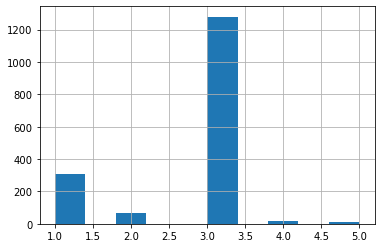

In [58]:
test['num_plots_sampled'].hist() # Typically 3